# __01_EDA - Analiza / czyszczenie danych__

# Used Car Price Prediction

This dataset contains 7,400 used car listings from India with 29 features, including car specifications, pricing details, ownership history, and availability.

# Dane/Importy

### Importy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

### Załadowanie Danych

In [3]:
df = pd.read_csv(r'../data/Used_Car_Price_Prediction.csv')
df.sample(5)

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
5797,hyundai xcent,2014,petrol,52070,401999,ahmedabad,939,sedan,manual,s 1.2,...,1,365607,450411.0,great,2021-03-24T06:06:23.862,True,9337,60300,False,False
5874,hyundai elite i20,2017,diesel,68730,567899,ahmedabad,1331,hatchback,manual,sportz 1.4,...,2,546239,663873.0,great,2020-10-26T05:34:41.634,True,13191,85185,False,False
5104,maruti swift,2019,petrol,1890,652999,chennai,675,hatchback,manual,vxi,...,2,668366,785451.0,great,2021-03-21T13:47:04.257,True,15168,97950,False,False
5988,maruti swift,2013,diesel,94181,370000,ahmedabad,156,hatchback,manual,vdi,...,1,301000,NaN,great,2019-08-24T07:04:43.198,True,8594,55500,False,False
2604,maruti wagon r,2005,petrol,87990,65000,new delhi,219,hatchback,manual,lxi,...,3,0,NaN,overpriced,2019-08-23T11:41:39.56,False,1510,9750,False,False


# __Analiza danych__

## 1. Wstępna analiza danych

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [5]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


## 2. Sprawdzanie pusty/powtarzających sie wartości w danych

### 2.1 Sprawdzenie brakujących wartości

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df = df.dropna()

body_type               103
transmission            556
registered_city          10
registered_state         10
source                  126
car_availability        620
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
dtype: int64


### 2.2 Sprawdzenie duplikatów

In [7]:
duplicate_values = df.duplicated().sum()
print("Duplicate values: ", duplicate_values)

Duplicate values:  0


## 3. Rozkłady wartości cech

### 3.1 Rozkład wartości liczbowych

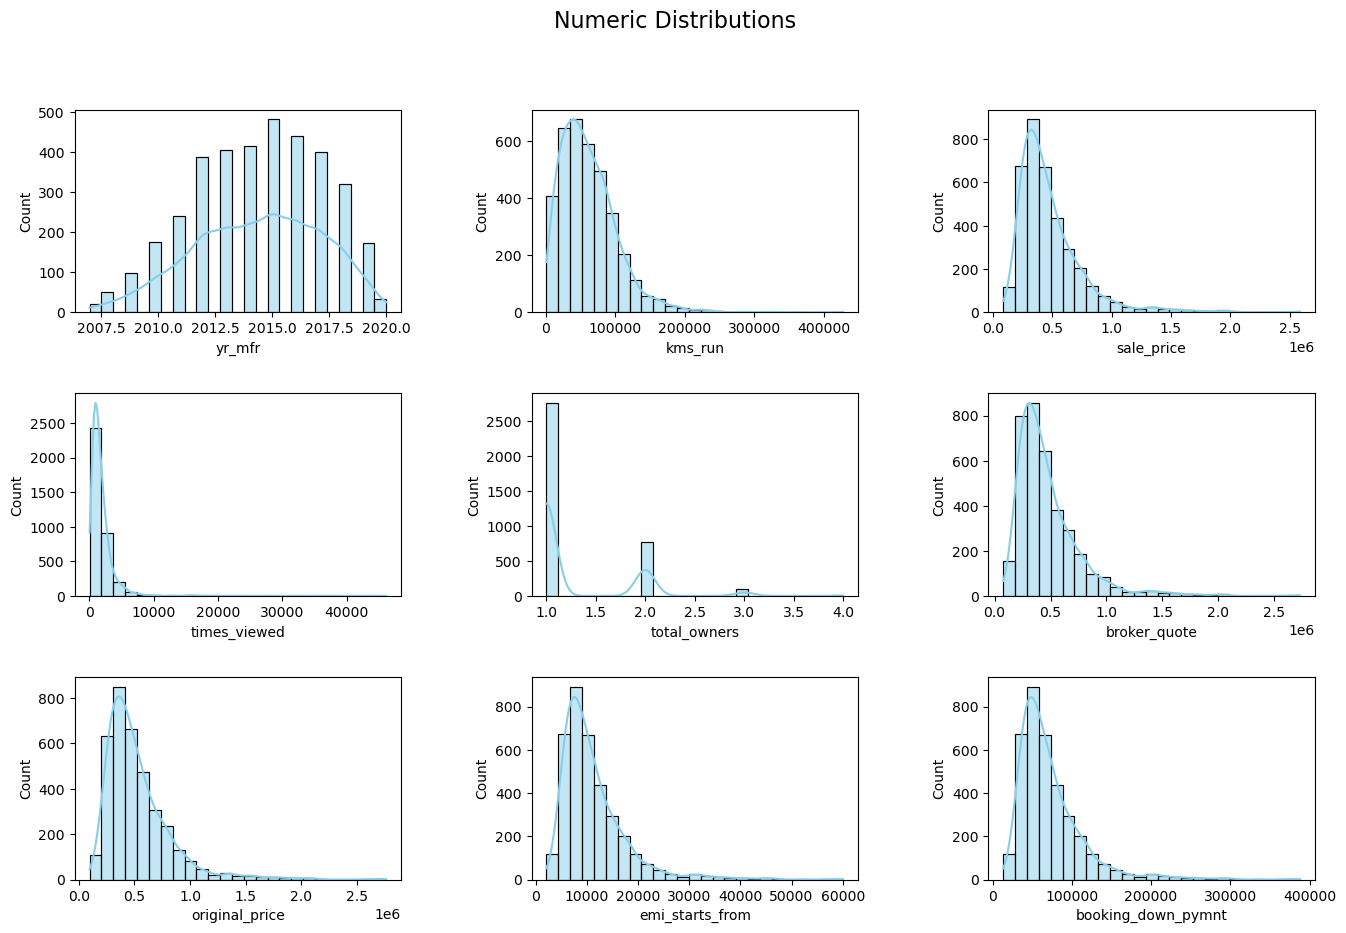

In [8]:
numeric_list = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

def plot_numeric_distributions(df, cols, nrows, ncols, title):
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, 10))
    axs = axs.flatten() 
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=25, kde=True, ax=axs[i], color='skyblue', legend=False)
        plt.xticks(rotation=0)
        
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
        
    fig.suptitle(title, fontsize=16)
    plt.show()

plot_numeric_distributions(df, numeric_list, 3, 3, "Numeric Distributions")

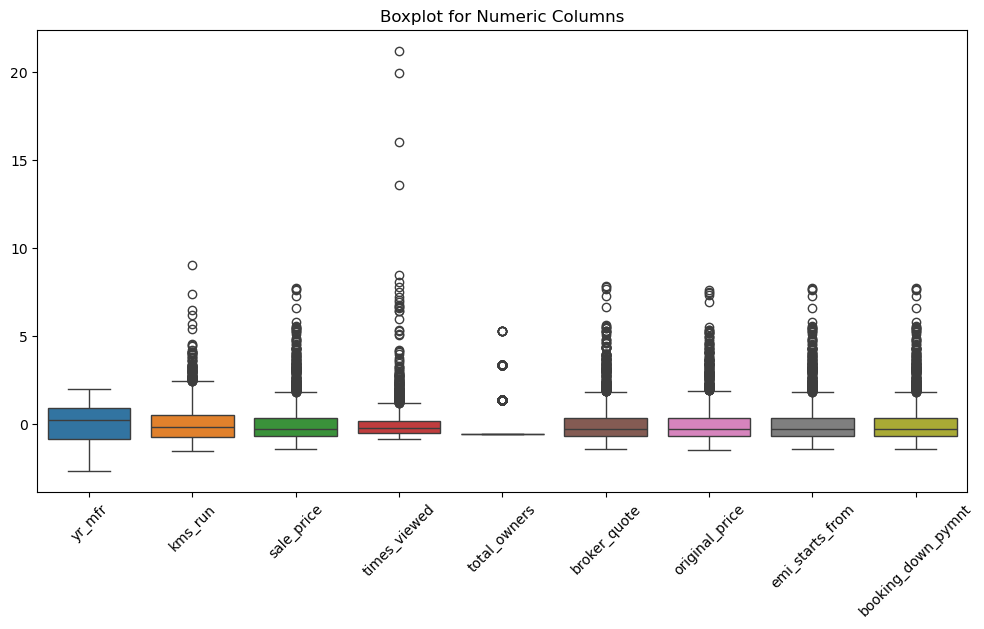

In [9]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_list])

df_scaled = pd.DataFrame(scaled_values, columns=numeric_list)

plt.figure(figsize=(12,6))
sns.boxplot(data = df_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

### 3.2 Rozkład wartości kategorycznych

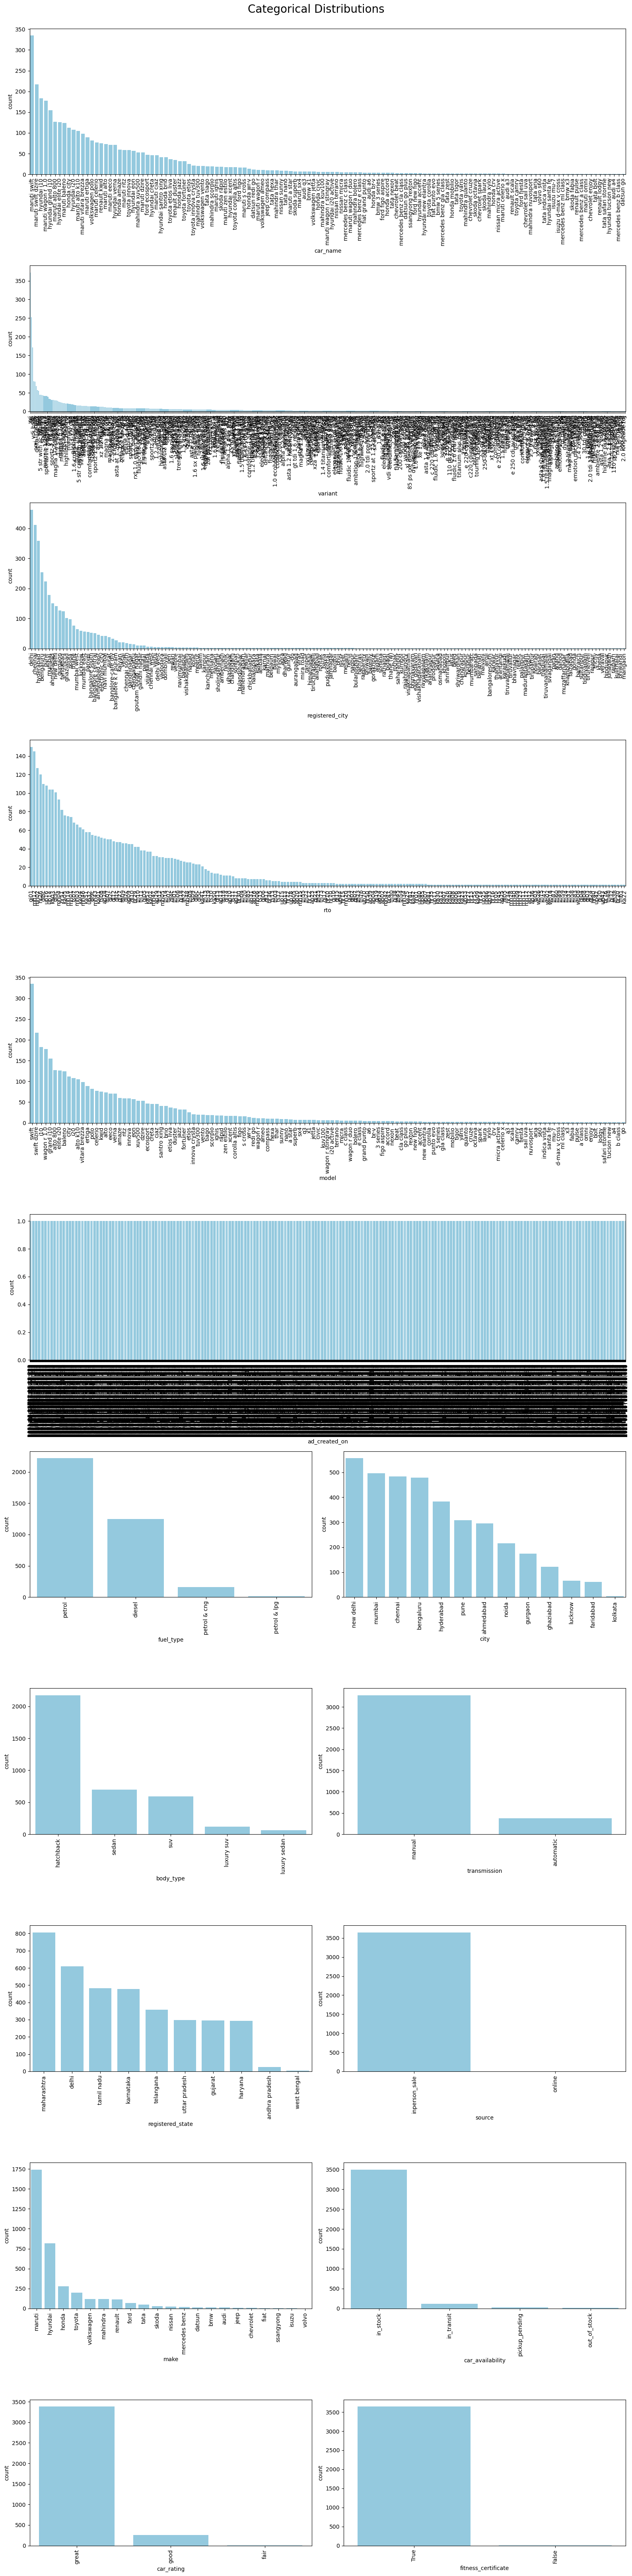

In [10]:
categorical_list = df.select_dtypes(include=["object"]).columns.tolist()

big_cols = ['car_name', 'variant', 'registered_city', 'rto', 'model', 'ad_created_on']
small_cols = [col for col in categorical_list if col not in big_cols]

def plot_all_categorical(df, big_cols, small_cols, color="skyblue"):
    n_big = len(big_cols)
    n_small = len(small_cols)
    n_small_rows = (n_small + 1) // 2
    nrows = n_big + n_small_rows

    fig = plt.figure(figsize=(16, nrows * 6))
    gs = gridspec.GridSpec(nrows, 2, figure=fig) 
    
    row = 0

    for col in big_cols:
        ax = fig.add_subplot(gs[row, :])  
        sns.countplot(
            x=col, data=df, ax=ax,
            color=color,
            order=df[col].value_counts().index
        )
        ax.tick_params(axis="x", rotation=90)
        row += 1

    col_idx = 0
    for col in small_cols:
        ax = fig.add_subplot(gs[row, col_idx])
        sns.countplot(
            x=col, data=df, ax=ax,
            color=color,
            order=df[col].value_counts().index
        )
        ax.tick_params(axis="x", rotation=90)

        col_idx += 1
        if col_idx == 2: 
            col_idx = 0
            row += 1

    fig.suptitle("Categorical Distributions", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_all_categorical(df, big_cols, small_cols)


### 3.3 Rozkład wartości logicznych

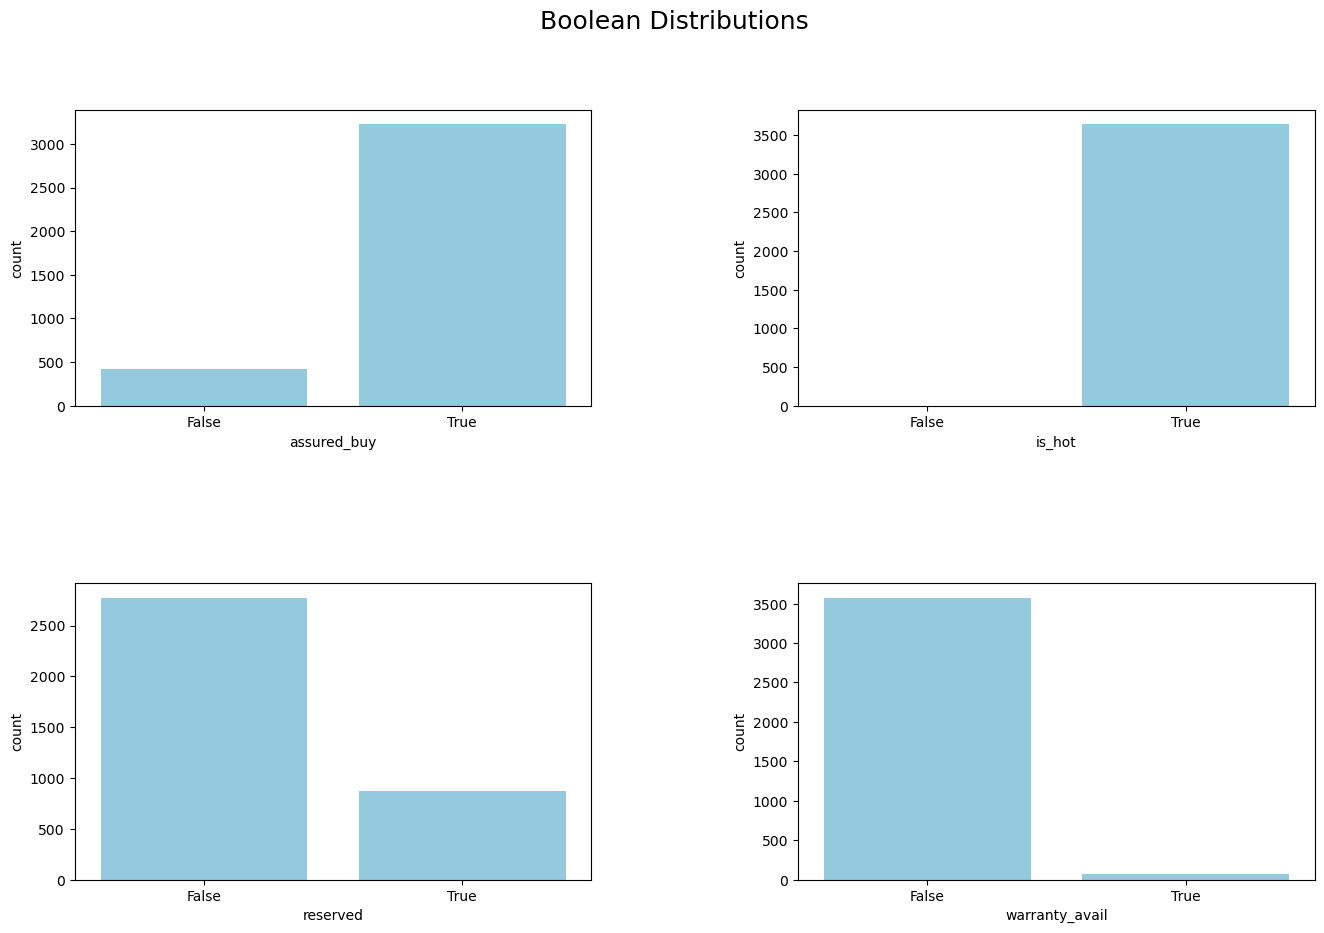

In [11]:
bool_list = df.select_dtypes(include=["bool"]).columns.tolist()

def plot_bool_distributions(df, cols, color="skyblue"):
    ncols = 2
    nrows = (len(cols) + 1) // 2 
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*5))
    
    if isinstance(axs, plt.Axes):
        axs = [axs]
    else:
        axs = axs.flatten()
    
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.countplot(x=col, data=df, ax=axs[i], color=color)
        axs[i].tick_params(axis='x', rotation=0)
    
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    
    fig.suptitle("Boolean Distributions", fontsize=18)
    plt.show()

plot_bool_distributions(df, bool_list)

## 4. Skalowanie danych

In [12]:
numeric_list = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

df[numeric_list] = scaled_values

In [13]:
def replace_and_encode_categories(df, col, threshold=0.01):
    """
    if col in big_cols:
        freq = df[col].value_counts(normalize=True)
        rare_categories = freq[freq < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    """
    df[col], uniques = pd.factorize(df[col])

    return df

for col in categorical_list:
    df = replace_and_encode_categories(df, col, threshold=0.01)



In [14]:
def encode_bool_columns(df, col):
    df[col] = df[col].astype(int)
    return df

for col in bool_list:
    df = encode_bool_columns(df, col)

## 5. Macierz korelacji

Macierz korelacji

🔹 Wysoka korelacja (>0.7):
car_name ↔ model: 1.00
sale_price ↔ broker_quote: 1.00
sale_price ↔ original_price: 0.99
sale_price ↔ emi_starts_from: 1.00
sale_price ↔ booking_down_pymnt: 1.00
city ↔ ad_created_on: 0.73
registered_city ↔ registered_state: 0.84
registered_city ↔ rto: 0.96
registered_state ↔ rto: 0.82
is_hot ↔ source: -1.00
broker_quote ↔ original_price: 0.98
broker_quote ↔ emi_starts_from: 1.00
broker_quote ↔ booking_down_pymnt: 1.00
original_price ↔ emi_starts_from: 0.99
original_price ↔ booking_down_pymnt: 0.99
emi_starts_from ↔ booking_down_pymnt: 1.00

🔸 Niska korelacja z sale_price (<0.1):
kms_run: -0.05
city: -0.05
total_owners: -0.04
fitness_certificate: -0.03
ad_created_on: -0.03
assured_buy: -0.02
warranty_avail: -0.02
is_hot: -0.00
source: 0.00
registered_city: 0.00
rto: 0.01
car_availability: 0.01
registered_state: 0.02
reserved: 0.06
times_viewed: 0.08


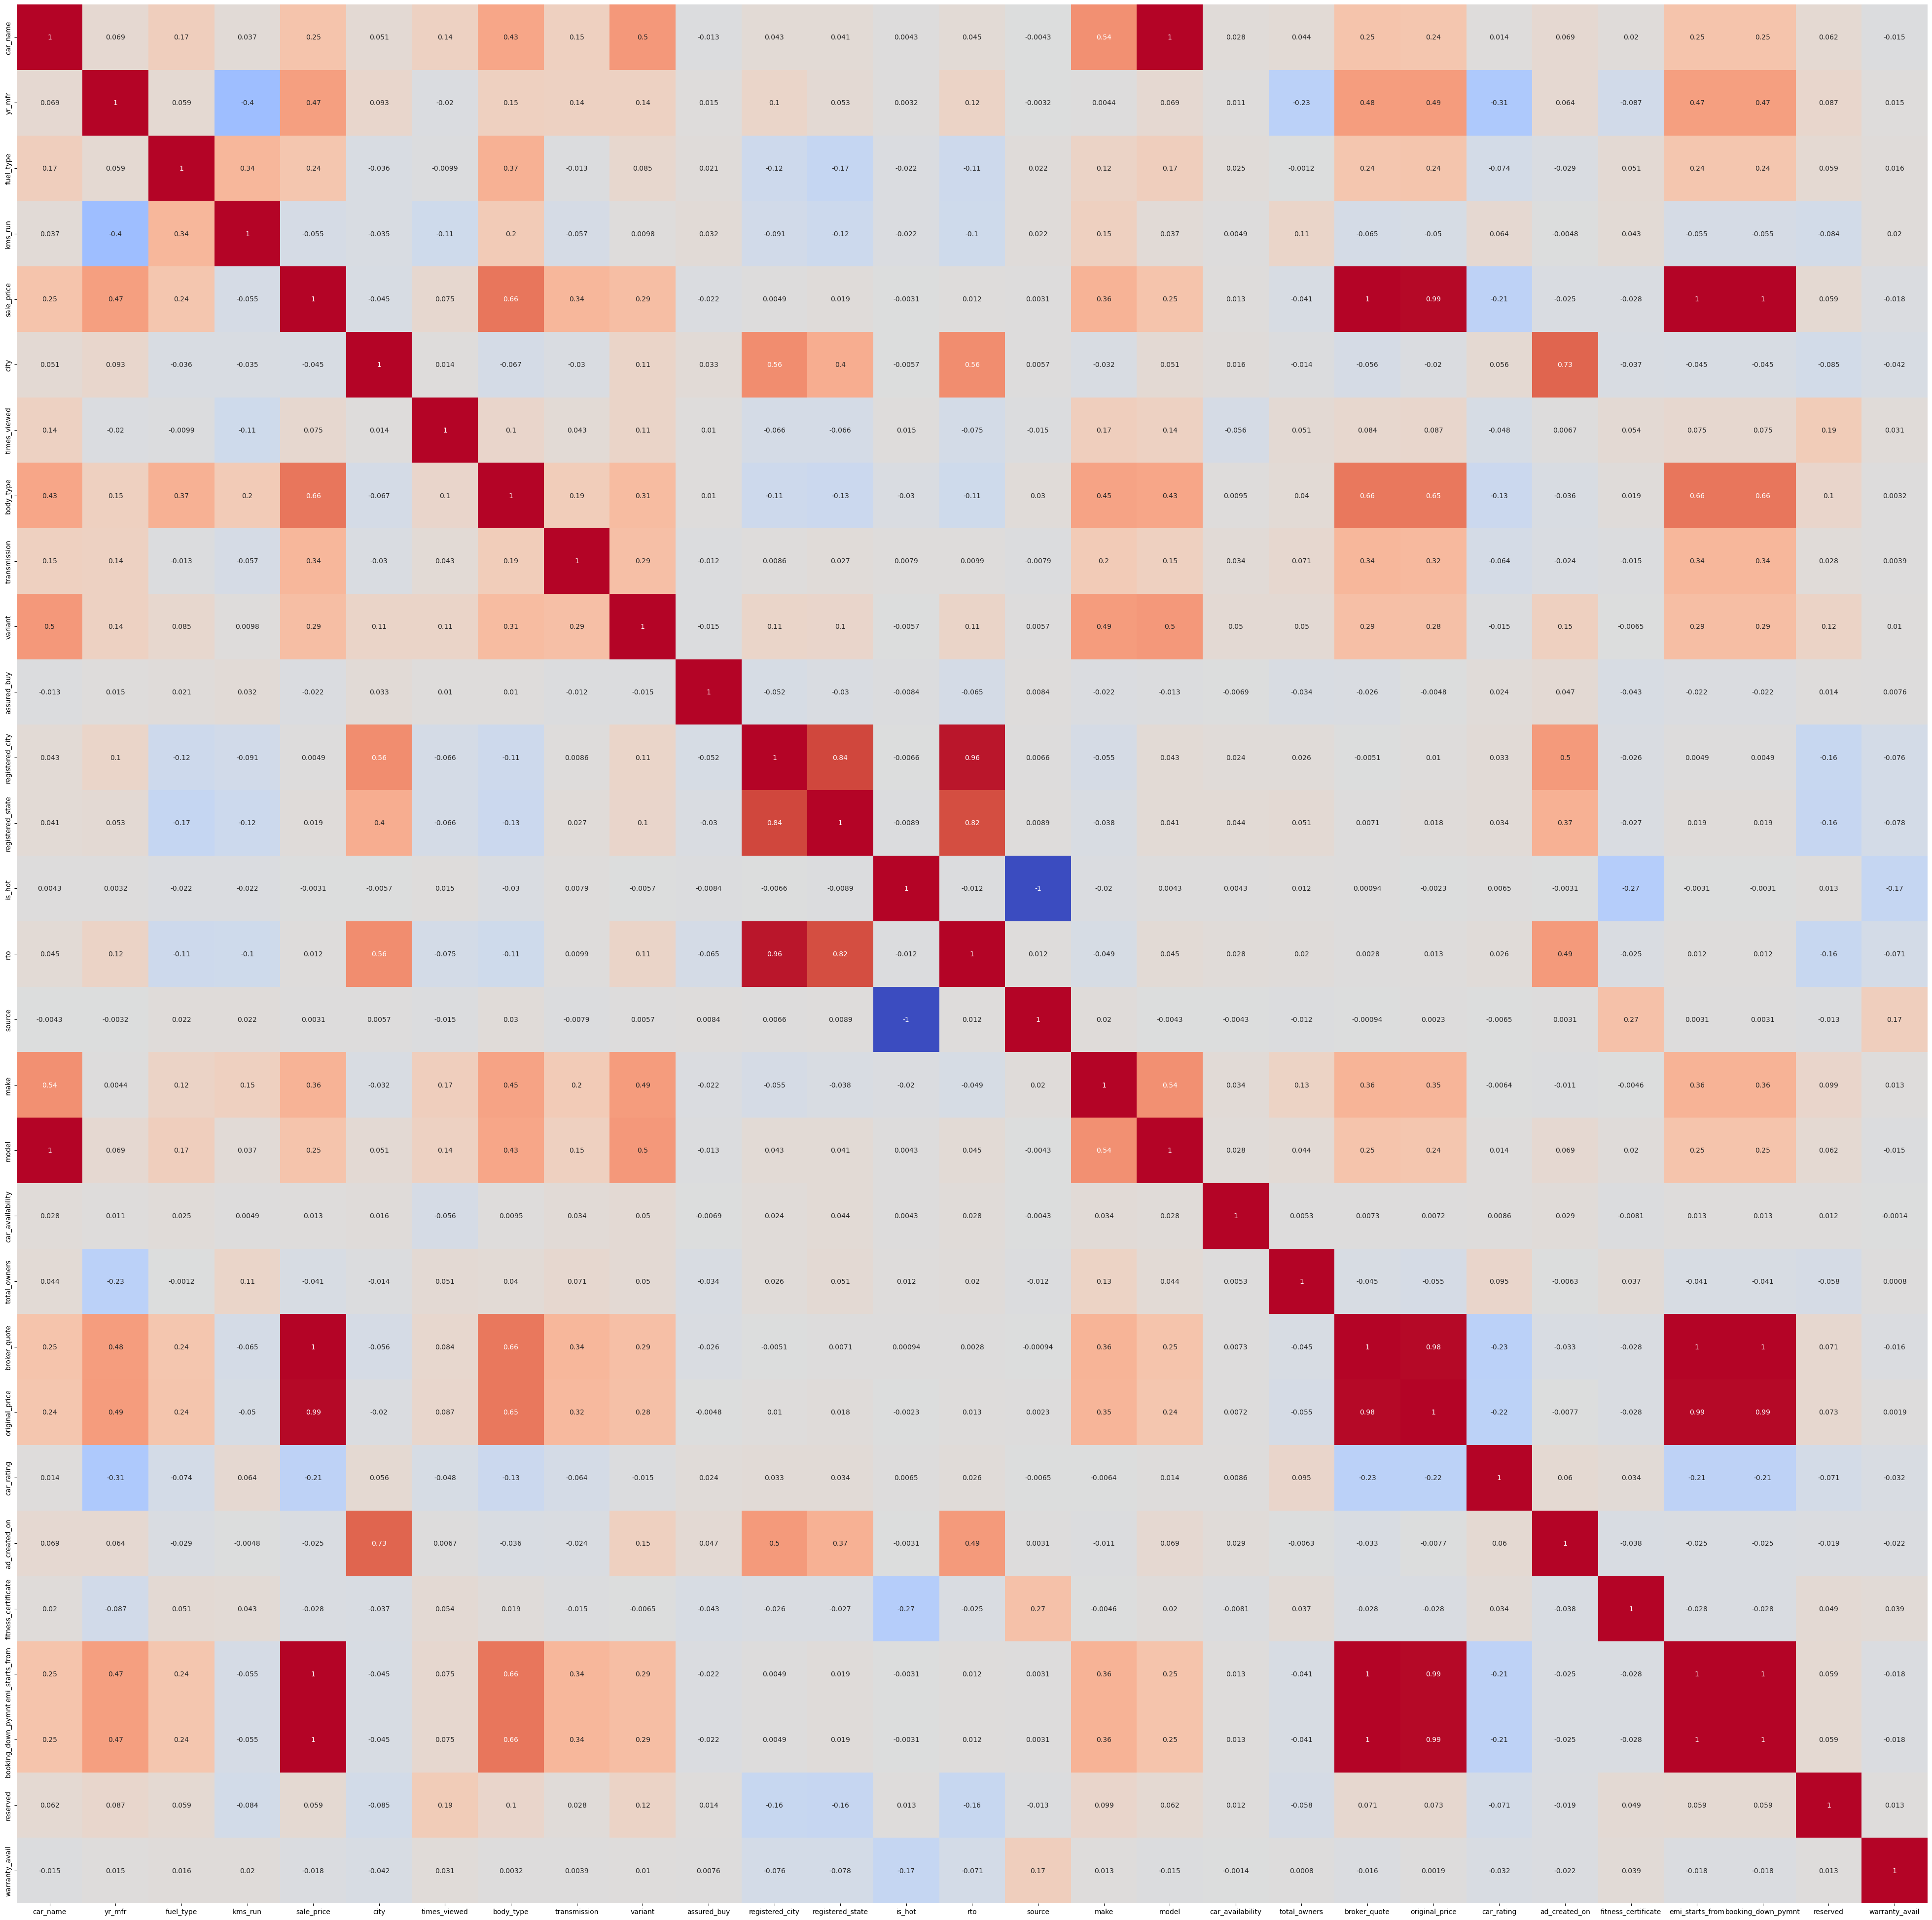

In [15]:
print("Macierz korelacji")
correlation_matrix = df.corr()
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("\n🔹 Wysoka korelacja (>0.7):")
for col1, col2, corr_value in high_corr:
    print(f"{col1} ↔ {col2}: {corr_value:.2f}")

target = "sale_price"
low_corr = correlation_matrix[target].drop(target)
low_corr = low_corr[low_corr.abs() < 0.1].sort_values()

print("\n🔸 Niska korelacja z sale_price (<0.1):")
for col, corr_value in low_corr.items():
    print(f"{col}: {corr_value:.2f}")

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.show()

## 6. Wnioski z analizy danych

##### Na podstawie przeprowadzonej analizy danych można zauważyć kilka istotnych kwestii:

1. Niezbalansowana zmienna docelowa – zmienna **sale_price** jest wyraźnie niezrównoważona. Bardzo niewiele obserwacji dotyczy cen powyżej 1 miliona, co może powodować problemy podczas budowania modeli uczenia maszynowego.

2. Wartości odstające w zmiennych numerycznych – w wielu kolumnach liczbowych występuje duża liczba wartości odstających, które mogą negatywnie wpływać na stabilność i jakość modeli.

3. Zmienność w kolumnach kategorycznych – w kolumnach takich jak *car_name*, *variant*, *registered_city*, *rto*, *model*, *ad_created_on* występuje bardzo duża liczba unikalnych wartości. Aby poprawić jakość modelu, rzadko pojawiające się kategorie warto połączyć i zastąpić etykietą "Other".

4. Kolumny logiczne z dużym niezbalansowaniem – zmienne takie jak *fitness_certificate*, *is_hot*, *warranty_avail* charakteryzują się silnym dysbalansem danych, przez co dostarczają ograniczonej ilości informacji. Warto rozważyć ich usunięcie z dalszej analizy.

5. Silne korelacje pomiędzy zmiennymi – część kolumn wykazuje bardzo wysoką korelację (>0.7), co prowadzi do redundancji informacji. Zaleca się usunięcie takich zmiennych jak: *car_name*, *broker_quote*, *original_price*, *emi_starts_from*, *ad_created_on*, *booking_down_pymnt*, *registered_state*, *rto*, *is_hot*.

# __Wstępne czyszczenie zbioru danych__

## Czyszczenie danych

### Przygotowanie: Klasyfikacja kolumn / Pobranie danych

In [16]:
category_columns = [
    'car_name',
    'yr_mfr',
    'fuel_type',
    'city',
    'body_type',
    'transmission',
    'variant',
    'registered_state',
    'registered_city',
    'rto',
    'source',
    'make',
    'model',
    'car_availability',
    'car_rating'
]
    
numeric_columns = [
    'kms_run',
    'sale_price',
    'times_viewed',
    'total_owners',
    'broker_quote',
    'original_price',
    'emi_starts_from',
    'booking_down_pymnt'
]

boolean_columns = [
    'assured_buy',
    'is_hot',
    'fitness_certificate',
    'reserved',
    'warranty_avail'
]

other_columns = [
    'ad_created_on'
]

all_columns = {
    'CATEGORICAL':category_columns,
    'NUMERIC':numeric_columns,
    'BOOLEAN':boolean_columns,
    'OTHER':other_columns
}

print('Dictionary column count:', sum(len(column_type) for column_type in all_columns.values()))

df_copy = pd.read_csv(r'../data/Used_Car_Price_Prediction.csv')

Dictionary column count: 29


### 1. Wypełnienie / Usuwanie braków

In [17]:
df_copy.isnull().sum().sort_values(ascending=False)

original_price         3280
car_availability        620
transmission            556
source                  126
body_type               103
registered_state         10
registered_city          10
car_rating                9
fitness_certificate       8
ad_created_on             1
kms_run                   0
sale_price                0
car_name                  0
variant                   0
assured_buy               0
times_viewed              0
city                      0
yr_mfr                    0
fuel_type                 0
rto                       0
is_hot                    0
broker_quote              0
total_owners              0
model                     0
make                      0
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [18]:
df_copy['original_price'].fillna(df_copy['sale_price'], inplace = True)
df_copy['car_availability'].fillna('NaN', inplace = True)
df_copy['transmission'].fillna('NaN', inplace = True)
df_copy = df_copy.dropna(subset=[
    'source',
    'body_type',
    'registered_city', 
    'registered_state', 
    'car_rating', 
    'fitness_certificate', 
    'ad_created_on'
])

C:\Users\abart\AppData\Local\Temp\ipykernel_12492\3174312149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['original_price'].fillna(df_copy['sale_price'], inplace = True)
C:\Users\abart\AppData\Local\Temp\ipykernel_12492\3174312149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [19]:
df_copy.isnull().sum().sort_values(ascending=False)

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
original_price         0
car_rating             0
ad_created_on          0
fitness_certificate    0
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

### 2. Dane numeryczne - przycinanie wartości

In [20]:
df_copy['kms_run'] = df_copy['kms_run'].clip(upper=150000)
df_copy['times_viewed'] = df_copy['times_viewed'].clip(upper=8000)
df_copy['total_owners'] = df_copy['total_owners'].clip(upper=3)

### 3. Zakodowanie cech kategorycznych / logicznych

In [21]:
for column_label in all_columns['CATEGORICAL']:
    df_copy[column_label] = df_copy[column_label].astype(str)
    df_copy[column_label].fillna('NAN', inplace=True)
    df_copy[column_label] = df_copy[column_label].astype('category').cat.codes.astype(int)

C:\Users\abart\AppData\Local\Temp\ipykernel_12492\3209732522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[column_label].fillna('NAN', inplace=True)
C:\Users\abart\AppData\Local\Temp\ipykernel_12492\3209732522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [22]:
for column_label in all_columns['BOOLEAN']:
    df_copy[column_label] = df_copy[column_label].astype(int)

### Pogląd / Zapis

In [23]:
df_copy.sample(25)

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
6832,173,17,2,58384,531899,1,917,0,2,481,...,2,528795,531899.0,2,2021-03-06T09:26:06.498,1,12355,79785,0,0
1749,99,17,0,54409,412399,10,793,0,2,706,...,1,402220,477381.0,2,2020-08-24T14:03:25.055,1,9579,61860,0,1
890,48,12,2,27225,308899,1,1310,0,2,542,...,1,288075,308999.0,2,2021-02-20T07:19:45.479,1,7175,46335,0,0
6915,30,17,0,136775,291999,11,1801,3,2,107,...,1,287124,365626.0,2,2021-03-12T07:13:07.878,1,6782,43800,1,0
4069,46,15,2,25889,339599,12,1865,0,2,548,...,2,341460,342960.0,2,2021-03-21T05:30:19.052,1,7888,50940,0,0
627,85,18,2,24432,477899,1,809,0,1,871,...,2,484267,485767.0,2,2021-03-22T09:41:01.204,1,11100,71685,0,0
6749,99,16,2,83300,394499,0,528,0,2,733,...,1,398502,489557.0,2,2021-03-27T11:02:20.438,1,9163,59175,0,0
6852,89,21,3,45317,452399,0,501,4,2,269,...,1,453000,454500.0,2,2021-03-19T04:56:44.452,1,10508,67860,0,0
5086,43,18,2,18639,552399,2,1958,0,2,542,...,1,565550,667215.0,2,2021-03-04T10:14:22.953,1,12831,82860,0,0
33,59,16,0,66743,276299,11,1339,3,2,595,...,1,252792,276299.0,2,2021-03-11T10:48:40.296,1,6418,41445,0,0


In [24]:
df_copy.to_csv('../data/Cleared_Used_Car_Price_Prediction.csv', index=False)

## Opis decyjzji / Uwagi

### Decyzje

<u> Traktowanie danych brakujących </u>
* __original_price__ (3280 | 44% brakujących) : __TYMCZASOWO__ uzupełnione wartością ceny sprzedaży ( _sale_price_ ) sprzedaży.  _Uzasadnienie_: Wartości brakujących jest zbyt wiele aby usunąć wiersze - należy albo je uzupełnić, albo usunąć kolumnę.

* __car_availibity__ (620 | 8% brakujących): Powstaje 3 kategoria dla nieznanego statusu o nienzanym dostępie dla samochodu. _Uzasadnienie_: Wartości brakujących jest zbyt wiele - wstawienie kategorii 'nieznanej' jest sposobem aby nie pozbywać się wierszy

* __transmission__ (556 | 8% brakujących): Tak jak powyżej - powstaje 3 kategoria dla nieznanego rodzaju skrzyni biegowej. _Uzasadnienie_: Takie samo jak w powyższym przypadku

* __source__ (126 | 2% brakujących): Rekordy z brakami usunięte. _Uzasadnienie_: Danych brakujujących jest na tyle mało, że można je usunąć - nie narażając się na szum w danych, kłopoty z ich przetworzeniem, itp.
* __body_type__ (103 | 1% brakujących): Rekordy z brakami usunięte. _Uzasadnienie_: Takie samo jak powyżej
* __registered_state__ (10 braków), __registered_city__ (10 braków), __car_rating__ (9 braków), __fitness_certificate__ (8 braków), __ad_created_on__ (1 brak): Rekordy z brakami usunięte. _Uzasadnienie_: Takie samo jak dla source


<u>Przycinanie </u>
* __kms_run__ : Przycięcie wartości wyższych niż 15000. _Uzasadnienie_: rekordów o wyższej wartości niż 15000, było ich jedynie 250.
* __times_viewed__ : Przycięcie wartości wyższych niż 8000. _Uzasadnienie_: rekordów o wyższej wartości, było jedynie 80.
* __total_owners__ : Przycięcie wartośći wyższych niż 3. _Uzasadnienie_: rekordów o wyższej wartości było jedynie 40.

<u>Kodowanie </u>
* __Dane kategoryczne__: (m.in. _fuel_type_, _make_, _yr_mfr_) zostały zastąpione indexem klasy
* __Dane logiczne__ : (m.in. _assured_buy_, _is_hot_, _fitness_certificate_) zostały zastąpione kodem wartości logicznej (0 - false, 1 - true)

### UWAGI
* __fuel_type__ : ponad 6700 rekordów są oznaczone jako albo 'diesel' albo paliwo ('petrol') - wyjątki są 3: paliwo & png (400 rekordów), paliwo * lpg (41), elektryk (6) - warto roważyć sens wyjątków (szczególnie lpg, oraz elektryk)
* __car_availibity__ : ponad 500 braków w danych, 6485/7400 danych jest oznaczona jako 'in_stock' - warto rozważyć sens cechy
* __transmission__: ponad 500 braków w danych, 84% rekordów jest oznaczona jako 'manual' - warto rozważyć sens cechy 
* Kolumny jak __original_price__, __broker_quote__ są _de facto_ pochodne od wartości ceny sprzedaży (_sale_price_) - warto rozważyć sens cechy. Warto rozważyć podmienienie cech na różnic ich wartosic z ceną sprzedaży.
* __ad_created_on__ : wszystkie daty, w której powstały reklamy są między 2019 a 2021 - warto rozważyć sens cechy. Warto rozważyć zamianę na rożnicę między rokiem wydania reklamy a rokiem wyprodukowania (_ad_created_on_ - _yr_mfr_) 

# __Wybór metryki oceny modelu__

Problem __'przewidywania ceny sprzedaży samochodu'__, jest z natury __regresyjny__ - przywidujemy wartość skalarną a nie logiczną/kategoryczną. W związku z powyższym, __do dyspozycji mamy metryki określające średni błąd__ w odnajdywaniu prawdziwej wartości numerycznej: Bezwzględny średni błąd (MAE), Średni błąd kwadratowy (MSE), Pierwiastek średniego błędu kwadratowego (RMSE), Współczynnik determinacji (R^2), itp.

Do naszego problemu, wybierzemy _Pierwiastek średniego błędu kwadratowego_ (RMSE) jako współczynnik oceny modelu. Metryka pokazuje nam wartość o ile średnio myli się model uczenia maszynowego - np. wynikiem RMSE może być 9000,23 (czyli nasz model średnio myli się o 9000,23zł w stosunku do prawdziwej wartości). Jest to metryka łatwa do interpretacji zarówno w odczycie, jak i w ocenie modelu (im niższa jest wartość, tym model jest dokładniejszy)